# Event Planning Automation

In [16]:
import warnings

warnings.filterwarnings("ignore")

In [17]:
from crewai import Agent, Task, Crew

In [18]:
import os
from dotenv import load_dotenv

dotenv_path = os.path.abspath(os.path.join(os.getcwd(), "..", ".env"))

load_dotenv(dotenv_path)

openai_api_key = os.getenv("OPENAI_API_KEY")
openai_model_name = os.getenv("OPENAI_MODEL_NAME")

## Tools

In [19]:
# using ScrapeWebsiteTool and SerperDevTool
from crewai_tools import ScrapeWebsiteTool, SerperDevTool

# Initialize tools
search_tool = SerperDevTool()  # search for websites
scrape_tool = ScrapeWebsiteTool()  # scrape the websites

## Agents

In [20]:
# Agent 1: Venue Coordinator
venue_coordinator = Agent(
    role="Venue Coordinator",
    goal="Identify and book an appropriate venue based on event requirements",
    tools=[search_tool, scrape_tool],
    verbose=True,
    backstory=(
        "With a keen sense of space and "
        "understanding of event logistics, "
        "you excel at finding and securing "
        "the perfect venue that fits the event's theme, "
        "size, and budget constraints."
    ),
)

In [21]:
# Agent 2: Logistics Manager
logistics_manager = Agent(
    role="Logistics Manager",
    goal=("Manage all logistics for the event including catering and equipmen"),
    tools=[search_tool, scrape_tool],
    verbose=True,
    backstory=(
        "Organized and detail-oriented, "
        "you ensure that every logistical aspect of the event "
        "from catering to equipment setup "
        "is flawlessly executed to create a seamless experience."
    ),
)

In [22]:
# Agent 3: Marketing and Communications Agent
marketing_communications_agent = Agent(
    role="Marketing and Communications Agent",
    goal="Effectively market the event and communicate with participants",
    tools=[search_tool, scrape_tool],
    verbose=True,
    backstory=(
        "Creative and communicative, "
        "you craft compelling messages and "
        "engage with potential attendees "
        "to maximize event exposure and participation."
    ),
)

## Structured outputs schemas

In [ ]:
from pydantic import BaseModel


# strongly typed output
class VenueDetails(BaseModel):
    name: str
    address: str
    capacity: str
    booking_status: str

## Tasks

In [ ]:
venue_task = Task(
    description="Find a venue in {event_city}",
    expected_output="All the details of a specifically chosen venue you found to accommodate the event.",
    human_input=True,  # approval of results before task is completed
    output_json=VenueDetails,  # strongly typed output info input here
    output_file="venue_details.json",  # output is saved to a file
    agent=venue_coordinator,
)

In [ ]:
logistics_task = Task(
    description="Coordinate catering and equipment for an event with {expected_participants} participants on {tentative_date}.",
    expected_output="Confirmation of all logistics arrangements including catering and equipment setup.",
    human_input=True,  # approval of results before task is completed
    async_execution=True,  # parallel execution of task
    agent=logistics_manager,
)

In [ ]:
marketing_task = Task(
    description="Promote the {event_topic} "
    "aiming to engage at least"
    "{expected_participants} potential attendees.",
    expected_output="Report on marketing activities "
    "and attendee engagement formatted as markdown.",
    async_execution=True,
    output_file="marketing_report.md",  # Outputs the report as a text file
    agent=marketing_communications_agent,
)

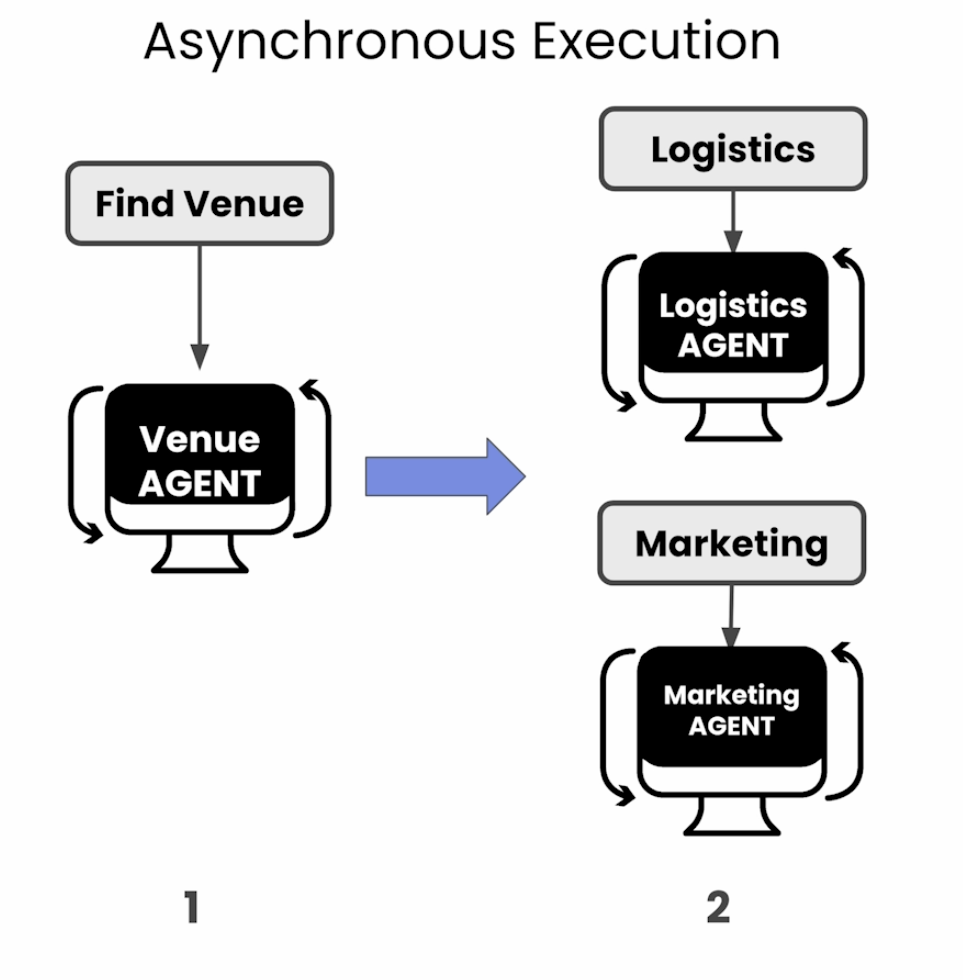

## Crew and execution

In [ ]:
event_management_crew = Crew(
    agents=[venue_coordinator, logistics_manager, marketing_communications_agent],
    tasks=[logistics_task, marketing_task, venue_task],
    verbose=True,
)

In [ ]:
event_details = {
    "event_topic": "ethree solutions expo",
    "event_description": "Expo for an information technology solutions firm called ethree solutions, a gathering of tech innovators and industry leaders in the AI space",
    "event_city": "San Juan, PR",
    "tentative_date": "2025-09-11",
    "expected_participants": 100,
    "budget": 2000,
    "venue_type": "Conference Hall",
}

In [32]:
results = event_management_crew.kickoff(inputs=event_details)

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 2e642bf0-dae5-4549-bffe-160a45af9f09                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Logistics Manager                                                                                       │
│                                                                                                                 │
│  Task: Coordinate catering and equipment for an event with 100 participants on 2025-09-11.                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Marketing and Communications Agent                                                                      │
│                                                                                                                 │
│  Task: Promote the ethree solutions expo aiming to engage at least100 potential attendees.                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Search the internet with Serper                                                                          │
│  Error: Arguments validation failed: 1 validation error for SerperDevToolSchema                                 │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'catering...cipants', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type                               │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Search the internet with Serper                                                                          │
│  Error: Arguments validation failed: 1 validation error for SerperDevToolSchema                                 │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'catering...cipants', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type                               │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Search the internet with Serper                                                                          │
│  Error: Arguments validation failed: 1 validation error for SerperDevToolSchema                                 │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'catering...cipants', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type                               │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Arguments validation failed: 1 validation error for SerperDevToolSchema
search_query
  Input should be a valid string [type=string_type, input_value={'description': 'catering...cipants', 'type': 'str'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type.
 Tool Search the internet with Serper accepts these inputs: Tool Name: Search the internet with Serper
Tool Arguments: {'search_query': {'description': 'Mandatory search query you want to use to search the internet', 'type': 'str'}}
Tool Description: A tool that can be used to search the internet with a search_query. Supports different search types: 'search' (default), 'news'



╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Logistics Manager                                                                                       │
│                                                                                                                 │
│  Thought: Thought: I need to gather baseline information and create a robust catering and equipment plan. I     │
│  will search for standard checklists and best practices for events with 100 attendees to inform catering        │
│  menus, equipment needs, staffing, timing, and setup. Then I will assemble a detailed logistics plan and        │
│  identify any missing details to confirm with you.                                                              │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": {\"description\": \"catering and equipment checklist for event 100 participants\",         │
│  \"type\": \"str\"}}"                                                                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  I encountered an error while trying to use the tool. This was the error: Arguments validation failed: 1        │
│  validation error for SerperDevToolSchema                                                                       │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'catering...cipants', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type.                              │
│   Tool Search the internet with Serper accepts these inputs: Tool Name: Search the internet with Serper         │
│  Tool Arguments: {'search_query': {'description': 'Mandatory search query you want to use to search the         │
│  internet', 'type': 'str'}}                                                                                     │
│  Tool Description: A tool that can be used to search the internet with a search_query. Supports different       │
│  search types: 'search' (default), 'news'.                                                                      │
│  Moving on then. I MUST either use a tool (use one at time) OR give my best final answer not both at the same   │
│  time. When responding, I must use the following format:                                                        │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: you should always think about what to do                                                              │
│  Action: the action to take, should be one of [Search the internet with Serper, Read website content]           │
│  Action Input: the input to the action, dictionary enclosed in curly braces                                     │
│  Observation: the result of the action                                                                          │
│  ```                                                                                                            │
│  This Thought/Action/Action Input/Result can repeat N times. Once I know the final answer, I must return the    │
│  following format:                                                                                              │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: I now can give a great answer                                                                         │
│  Final Answer: Your final answer must be the great and the most complete as possible, it must be outcome        │
│  described                                                                                                      │
│                                                                                                                 │
│  ```                                                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Search the internet with Serper                                                                          │
│  Error: Arguments validation failed: 1 validation error for SerperDevToolSchema                                 │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'ethree s...o event', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type                               │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Search the internet with Serper                                                                          │
│  Error: Arguments validation failed: 1 validation error for SerperDevToolSchema                                 │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'ethree s...o event', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type                               │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Search the internet with Serper                                                                          │
│  Error: Arguments validation failed: 1 validation error for SerperDevToolSchema                                 │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'ethree s...o event', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type                               │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Arguments validation failed: 1 validation error for SerperDevToolSchema
search_query
  Input should be a valid string [type=string_type, input_value={'description': 'ethree s...o event', 'type': 'str'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type.
 Tool Search the internet with Serper accepts these inputs: Tool Name: Search the internet with Serper
Tool Arguments: {'search_query': {'description': 'Mandatory search query you want to use to search the internet', 'type': 'str'}}
Tool Description: A tool that can be used to search the internet with a search_query. Supports different search types: 'search' (default), 'news'



╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Marketing and Communications Agent                                                                      │
│                                                                                                                 │
│  Thought: Thought: Plan to search for "ethree solutions expo" to gather event details, branding, and attendee   │
│  info. Then, if needed, read the official site content for specifics to tailor marketing and engagement         │
│  tactics.                                                                                                       │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": {\"description\": \"ethree solutions expo event\", \"type\": \"str\"}}"                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  I encountered an error while trying to use the tool. This was the error: Arguments validation failed: 1        │
│  validation error for SerperDevToolSchema                                                                       │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'ethree s...o event', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type.                              │
│   Tool Search the internet with Serper accepts these inputs: Tool Name: Search the internet with Serper         │
│  Tool Arguments: {'search_query': {'description': 'Mandatory search query you want to use to search the         │
│  internet', 'type': 'str'}}                                                                                     │
│  Tool Description: A tool that can be used to search the internet with a search_query. Supports different       │
│  search types: 'search' (default), 'news'.                                                                      │
│  Moving on then. I MUST either use a tool (use one at time) OR give my best final answer not both at the same   │
│  time. When responding, I must use the following format:                                                        │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: you should always think about what to do                                                              │
│  Action: the action to take, should be one of [Search the internet with Serper, Read website content]           │
│  Action Input: the input to the action, dictionary enclosed in curly braces                                     │
│  Observation: the result of the action                                                                          │
│  ```                                                                                                            │
│  This Thought/Action/Action Input/Result can repeat N times. Once I know the final answer, I must return the    │
│  following format:                                                                                              │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: I now can give a great answer                                                                         │
│  Final Answer: Your final answer must be the great and the most complete as possible, it must be outcome        │
│  described                                                                                                      │
│                                                                                                                 │
│  ```                                                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Logistics Manager                                                                                       │
│                                                                                                                 │
│  Thought: Thought: I will search for catering and equipment checklists for an event with 100 participants to    │
│  inform planning.                                                                                               │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"catering and equipment checklist for event 100 participants\"}"                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'catering and equipment checklist for event 100 participants', 'type': 'search',    │
│  'num': 10, 'engine': 'google'}, 'organic': [{'title': 'Catering Equipment Checklist For Events: Setup Guide    │
│  For Success', 'link':                                                                                          │
│  'https://www.tablecoversnow.com/guides/catering-equipment-checklist-setup-for-events?srsltid=AfmBOorxUMATqzdU  │
│  30bwoKmXVBPqdHAt-SCo78FXvqzAvMYb6259GEQd', 'snippet': 'Our comprehensive catering supplies checklist will      │
│  guide you through essential items that you need for a seamless event setup.', 'position': 1}, {'title': 'The   │
│  Event Planning Checklist Used By Top Event Planners', 'link':                                                  │
│  'https://www.wildapricot.com/blog/event-planning-checklist', 'snippet': 'Looking to become an event planning   │
│  pro? Follow this event planning checklist that will take you through the process from start to finish.',       │
│  'position': 2}, {'title': 'The Essential Catering Supplies Checklist - Webstaurant Store', 'link':             │
│  'https://www.webstaurantstore.com/article/516/catering-supplies-checklist.html?srsltid=AfmBOoqyZLzYjWHql3XE1-  │
│  uVG7D2YVMRVD5aBv0HIP-un6wB3SonAAQj', 'snippet': 'Catering Supplies & Equipment Checklist ; Tablecloths;        │
│  Napkins; Dinnerware; Flatware; Charger Plates; Glassware; Salt and Pepper Shakers; Water ...', 'position':     │
│  3}, {'title': 'Catering Equipment & Supplies Checklist for Successful Events', 'link':                         │
│  'https://www.equippers.com/blog/catering-equipment-supplies-checklist?srsltid=AfmBOorzTOBfXgzMF0T1Poe_ZlKrlUM  │
│  q-8NqYl-i30euGTnp03kSBe6D', 'snippet': 'Cooking and Holding Equipment · Serving Equipment · Beverage Supplies  │
│  · Tables and Chairs · Cleaning Supplies and Janitorial Equipment ...', 'position': 4}, {'title': 'Corporate    │
│  Event Planning Checklist: 29 Things You Need to Do', 'link':                                                   │
│  'https://www.deskbird.com/blog/corporate-event-planning-checklist', 'snippet': 'It contains all the actions    │
│  you must tackle before the big day, from sending invitations to ordering catering and booking a venue.',       │
│  'position': 5}, {'title': 'The Ultimate Party Planni...                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Logistics Manager                                                                                       │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  Your final answer must be the great and the most complete as possible, it must be outcome described            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 ## Final Result: Your final answer must be the great and the most complete as possible, it must be outcome described
 

=====
## HUMAN FEEDBACK: Provide feedback on the Final Result and Agent's actions.
Please follow these guidelines:
 - If you are happy with the result, simply hit Enter without typing anything.
 - Otherwise, provide specific improvement requests.
 - You can provide multiple rounds of feedback until satisfied.
=====



╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Marketing and Communications Agent                                                                      │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  # Ethree Solutions Expo — Marketing Plan and Attendee Engagement (Target: 100+ Potential Attendees)            │
│                                                                                                                 │
│  ## Objective                                                                                                   │
│  - Promote the Ethree Solutions Expo and secure engagement from at least 100 potential attendees ready to       │
│  learn about Ethree’s solutions, innovations, and partner ecosystem.                                            │
│  - Build a measurable pipeline of registrations/inquiries with clear next steps for conversion into on-site     │
│  attendance.                                                                                                    │
│                                                                                                                 │
│  ## Target Audience                                                                                             │
│  - CIOs, CTOs, IT Directors, Solutions Architects, System Integrators, MSPs, and tech decision-makers in mid-   │
│  to large-enterprise IT environments.                                                                           │
│  - Developers and engineers interested in Ethree’s solutions, API ecosystems, or compatible platforms.          │
│  - Strategic partners and potential sponsors looking to align with the Ethree brand.                            │
│                                                                                                                 │
│  ## Core Messaging (Value Propositions)                                                                         │
│  - Discover practical, scalable solutions that align with your existing tech stack.                             │
│  - Live demos and real-world case studies showcasing ROI and time-to-value.                                     │
│  - Networking with peers, partners, and Ethree product experts.                                                 │
│  - Early access insights into upcoming features, roadmap, and integrations.                                     │
│                                                                                                                 │
│  ## Marketing Channels & Tactics                                                                                │
│                                                                                                                 │
│  ### 1) Landing Page & Registration                                                                             │
│  - Create a dedicated expo landing page with:                                                                   │
│    - Clear value proposition, audience pain points, and benefits of attending.                                  │
│    - Prominent CTA: “Reserve Your Spot” with a simple form (name, email, company, role, interest area).         │
│    - Early-bird incentives (e.g., exclusive demo slots, downloadable whitepaper, swag).                         │
│    - A countdown timer to create urgency.                                                                       │
│    - Social proof: logos of sponsors/partners (if any) and 1–2 short testimonial quotes.                        │
│  - Post-registration follow-up sequence:               

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 68132431-ef58-46e2-8a23-44d793a36a38                                                                     │
│  Agent: Marketing and Communications Agent                                                                      │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 3c7ec1f9-821f-4cec-b83b-8389114a7ce0                                                                     │
│  Agent: Logistics Manager                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Venue Coordinator                                                                                       │
│                                                                                                                 │
│  Task: Find a venue in San Juan, PR                                                                             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Search the internet with Serper                                                                          │
│  Error: Arguments validation failed: 1 validation error for SerperDevToolSchema                                 │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'San Juan...ity 200', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type                               │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Search the internet with Serper                                                                          │
│  Error: Arguments validation failed: 1 validation error for SerperDevToolSchema                                 │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'San Juan...ity 200', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type                               │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Search the internet with Serper                                                                          │
│  Error: Arguments validation failed: 1 validation error for SerperDevToolSchema                                 │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'San Juan...ity 200', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type                               │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Arguments validation failed: 1 validation error for SerperDevToolSchema
search_query
  Input should be a valid string [type=string_type, input_value={'description': 'San Juan...ity 200', 'type': 'str'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type.
 Tool Search the internet with Serper accepts these inputs: Tool Name: Search the internet with Serper
Tool Arguments: {'search_query': {'description': 'Mandatory search query you want to use to search the internet', 'type': 'str'}}
Tool Description: A tool that can be used to search the internet with a search_query. Supports different search types: 'search' (default), 'news'



╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Venue Coordinator                                                                                       │
│                                                                                                                 │
│  Thought: Thought: I will search for suitable venues in San Juan, Puerto Rico that can host 100+ attendees,     │
│  focusing on conference/ expo-style spaces with clear capacity info and current availability or booking         │
│  status.                                                                                                        │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": {\"description\": \"San Juan PR conference venue capacity 200\", \"type\": \"str\"}}"      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  I encountered an error while trying to use the tool. This was the error: Arguments validation failed: 1        │
│  validation error for SerperDevToolSchema                                                                       │
│  search_query                                                                                                   │
│    Input should be a valid string [type=string_type, input_value={'description': 'San Juan...ity 200', 'type':  │
│  'str'}, input_type=dict]                                                                                       │
│      For further information visit https://errors.pydantic.dev/2.11/v/string_type.                              │
│   Tool Search the internet with Serper accepts these inputs: Tool Name: Search the internet with Serper         │
│  Tool Arguments: {'search_query': {'description': 'Mandatory search query you want to use to search the         │
│  internet', 'type': 'str'}}                                                                                     │
│  Tool Description: A tool that can be used to search the internet with a search_query. Supports different       │
│  search types: 'search' (default), 'news'.                                                                      │
│  Moving on then. I MUST either use a tool (use one at time) OR give my best final answer not both at the same   │
│  time. When responding, I must use the following format:                                                        │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: you should always think about what to do                                                              │
│  Action: the action to take, should be one of [Search the internet with Serper, Read website content]           │
│  Action Input: the input to the action, dictionary enclosed in curly braces                                     │
│  Observation: the result of the action                                                                          │
│  ```                                                                                                            │
│  This Thought/Action/Action Input/Result can repeat N times. Once I know the final answer, I must return the    │
│  following format:                                                                                              │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: I now can give a great answer                                                                         │
│  Final Answer: Your final answer must be the great and the most complete as possible, it must be outcome        │
│  described                                                                                                      │
│                                                                                                                 │
│  ```                                                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

Repaired JSON: [{"search_query": {"description": "San Juan Puerto Rico venue capacity 100 conference center booking
status", "type": "str"}}, ["type=string_type, input_value={'description': 'San Juan...booking status', 'type': 
'str'}, input_type=dict]"]]

Repaired JSON: [{"search_query": {"description": "San Juan Puerto Rico venue capacity 100 conference center booking
status", "type": "str"}}, ["type=string_type, input_value={'description': 'San Juan...booking status', 'type': 
'str'}, input_type=dict]"]]

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Venue Coordinator                                                                                       │
│                                                                                                                 │
│  Thought: Thought: I will search for suitable venues in San Juan, PR that can host 100+ attendees, focusing on  │
│  conference/ expo-style spaces with clear capacity info and current availability or booking status.             │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "[{\"search_query\": {\"description\": \"San Juan Puerto Rico venue capacity 100 conference center booking     │
│  status\", \"type\": \"str\"}}, [\"type=string_type, input_value={'description': 'San Juan...booking status',   │
│  'type': 'str'}, input_type=dict]\"]]"                                                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  Error: the Action Input is not a valid key, value dictionary.                                                  │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Venue Coordinator                                                                                       │
│                                                                                                                 │
│  Thought: Thought: I will search for suitable venues in San Juan, PR that can host 100+ attendees, focusing on  │
│  conference/ expo-style spaces with clear capacity info and current availability or booking status.             │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"San Juan Puerto Rico convention center capacity address booking status\"}"               │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'San Juan Puerto Rico convention center capacity address booking status', 'type':   │
│  'search', 'num': 10, 'engine': 'google'}, 'organic': [{'title': 'San Juan, Puerto Rico Convention Center &     │
│  Event Space', 'link':                                                                                          │
│  'https://amimagazine.global/Meeting-Event-Venues/San-Juan/Convention-Center/Puerto-Rico-Convention-Center-p58  │
│  053712', 'snippet': 'Largest Room Capacity - 16,576. Total Exhibit Space - 152,700. Key Facts. Address: 100    │
│  Bulevar Saint John San Juan, Puerto Rico 907; Phone: 1 787-641-7722; Fax ...', 'position': 1}, {'title':       │
│  'Puerto Rico Convention Center', 'link': 'https://prconvention.com/en/', 'snippet': 'Let our dedicated and     │
│  experienced staff help you plan the perfect event from start to finish. Enter your email and our team will     │
│  contact you promptly.', 'position': 2}, {'title': 'San Juan, Puerto Rico Convention Center & Event Space',     │
│  'link':                                                                                                        │
│  'https://www.meetings-conventions.com/Meeting-Event-Venues/San-Juan/Convention-Center/Puerto-Rico-Convention-  │
│  Center-p2081906', 'snippet': 'Largest Room Capacity - 16,576. Total Exhibit Space - 152,700. Compare Venues.   │
│  Key Facts. Address: 100 Bulevar Saint John San Juan, Puerto Rico 907; Phone: 1 ...', 'position': 3},           │
│  {'title': 'Puerto Rico Convention Center', 'link':                                                             │
│  'https://en.wikipedia.org/wiki/Puerto_Rico_Convention_Center', 'snippet': 'Address, 100 Bulevar Saint John,    │
│  Isla Grande, 00907. Location, Isla Grande (Santurce), San Juan, Puerto Rico · Coordinates · 18°27′10″N         │
│  66°05′33″W\ufeff / \ufeff18.452778 ...', 'position': 4}, {'title': 'Event Planners', 'link':                   │
│  'https://prconvention.com/en/eventplanners/', 'snippet': 'Self-parking lots are conveniently located adjacent  │
│  to the Convention Center with capacity for 2,215 vehicles. Contact 787-933-3636 for customized rate and ...',  │
│  'position': 5}, {'title': 'Puerto Rico Convention Center an ASM Managed Facility', 'link':                     │
│  'https://www.cvent.com/venues/san-juan/convention-center/puerto-rico-convention-center-an-asm-managed-facilit  │
│  y/venue-905a2a...                                                                                              │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Venue Coordinator                                                                                       │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  {                                                                                                              │
│    "name": "Puerto Rico Convention Center",                                                                     │
│    "address": "100 Convention Blvd, San Juan, Puerto Rico 00907",                                               │
│    "capacity": "Largest room capacity: 16,576; Total exhibit space: 152,700 sq ft",                             │
│    "booking_status": "Availability varies; not publicly posted. Please contact the venue sales team to confirm  │
│  dates and space for your event."                                                                               │
│  }                                                                                                              │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 ## Final Result: {
  "name": "Puerto Rico Convention Center",
  "address": "100 Convention Blvd, San Juan, Puerto Rico 00907",
  "capacity": "Largest room capacity: 16,576; Total exhibit space: 152,700 sq ft",
  "booking_status": "Availability varies; not publicly posted. Please contact the venue sales team to confirm dates and space for your event."
}
 

=====
## HUMAN FEEDBACK: Provide feedback on the Final Result and Agent's actions.
Please follow these guidelines:
 - If you are happy with the result, simply hit Enter without typing anything.
 - Otherwise, provide specific improvement requests.
 - You can provide multiple rounds of feedback until satisfied.
=====



╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: b6f3f9f7-ee67-425f-b339-589e5ddbb73b                                                                     │
│  Agent: Venue Coordinator                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 2e642bf0-dae5-4549-bffe-160a45af9f09                                                                       │
│  Tool Args:                                                                                                     │
│  Final Output: {                                                                                                │
│    "name": "Puerto Rico Convention Center",                                                                     │
│    "address": "100 Convention Blvd, San Juan, Puerto Rico 00907",                                               │
│    "capacity": "Largest room capacity: 16,576; Total exhibit space: 152,700 sq ft",                             │
│    "booking_status": "Availability varies; not publicly posted. Please contact the venue sales team to confirm  │
│  dates and space for your event."                                                                               │
│  }                                                                                                              │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [33]:
from IPython.display import Markdown

Markdown(results.raw)

{
  "name": "Puerto Rico Convention Center",
  "address": "100 Convention Blvd, San Juan, Puerto Rico 00907",
  "capacity": "Largest room capacity: 16,576; Total exhibit space: 152,700 sq ft",
  "booking_status": "Availability varies; not publicly posted. Please contact the venue sales team to confirm dates and space for your event."
}